In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


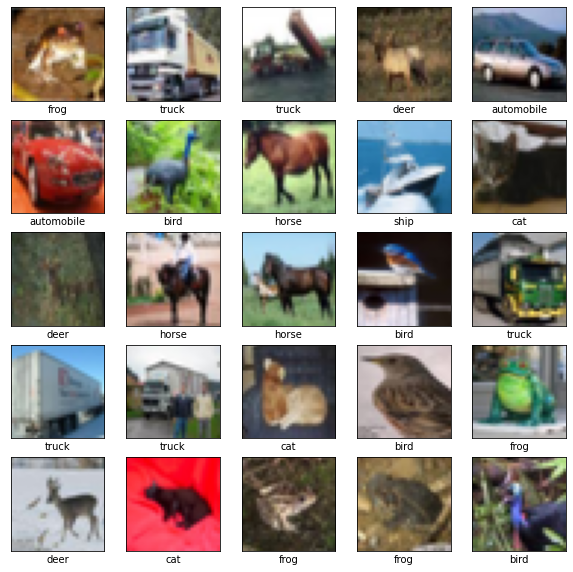

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(37, (2, 4), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 21s 8ms/step - loss: 1.4787 - accuracy: 0.4649 - val_loss: 1.1471 - val_accuracy: 0.5918
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0397 - accuracy: 0.6368 - val_loss: 0.9924 - val_accuracy: 0.6506ss: 1.0404 - accuracy: 0.
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8686 - accuracy: 0.6990 - val_loss: 0.9234 - val_accuracy: 0.6804
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7561 - accuracy: 0.7379 - val_loss: 0.8662 - val_accuracy: 0.7034
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6703 - accuracy: 0.7679 - val_loss: 0.8378 - val_accuracy: 0.7219
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5939 - accuracy: 0.7941 - val_loss: 0.8762 - val_accuracy: 0.7166
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5280 - accuracy: 0.8169 - 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 29, 37)        925       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 27, 64)        21376     
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 25, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

In [27]:
x=model.weights[0]

In [68]:
my_filter = x[:,:,:,1].numpy()

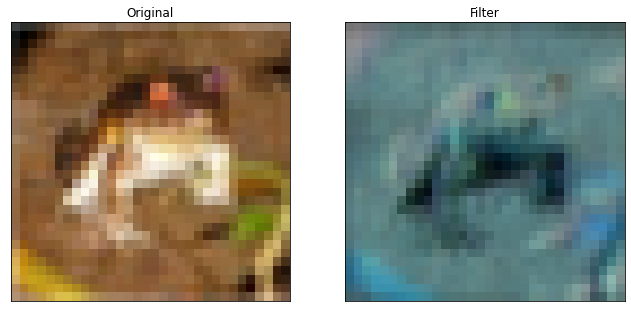

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


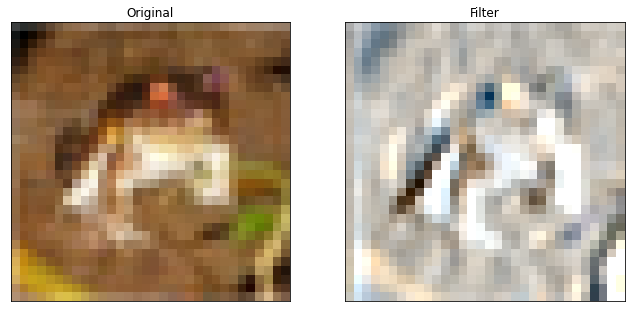

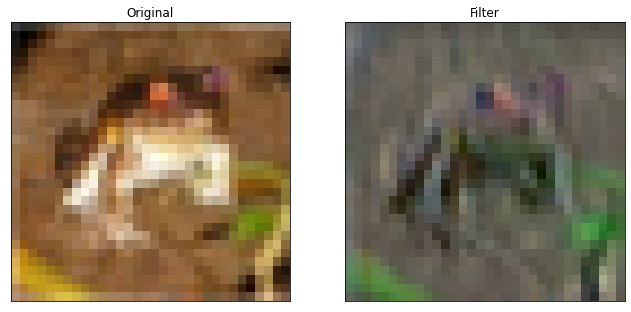

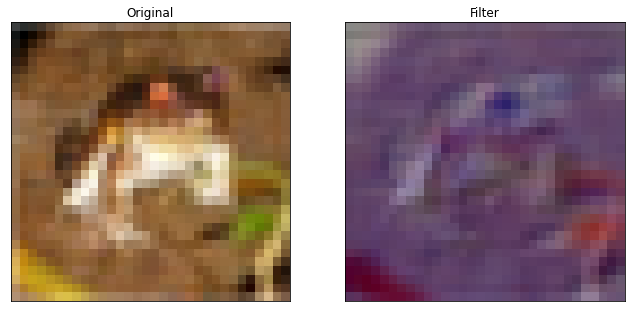

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


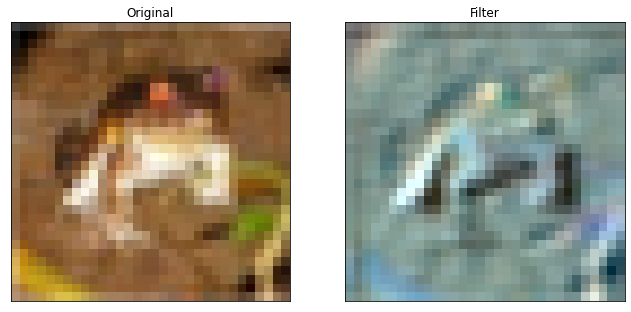

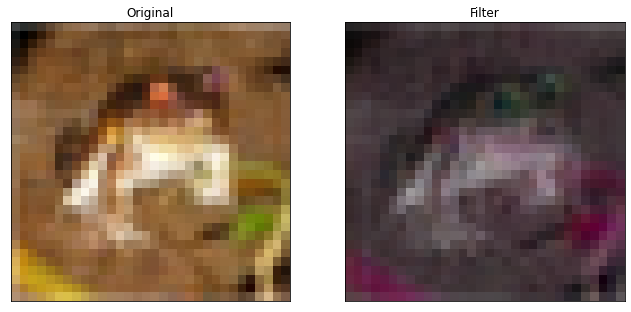

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


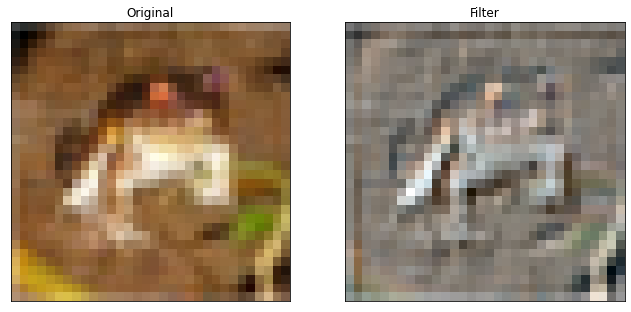

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


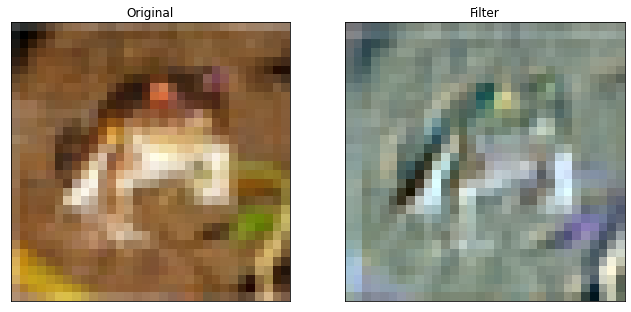

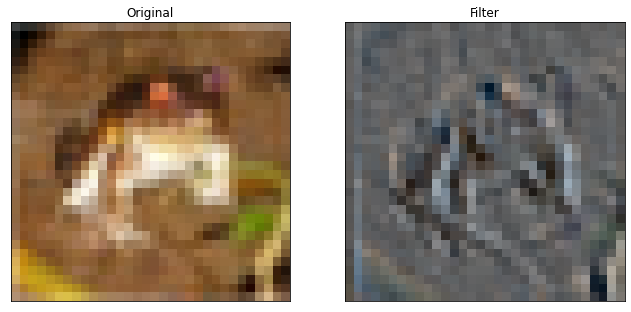

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


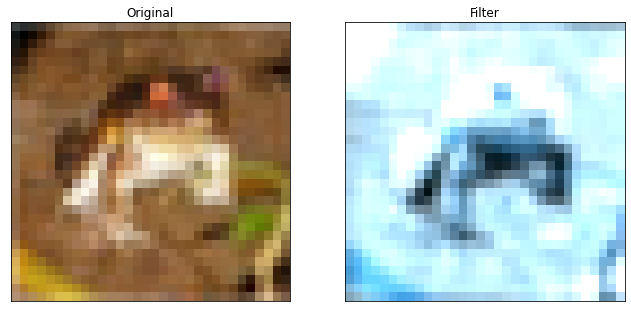

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


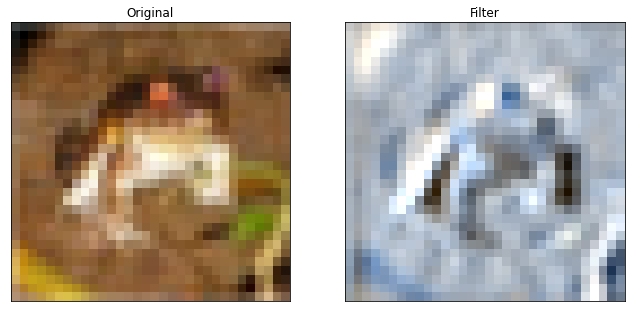

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


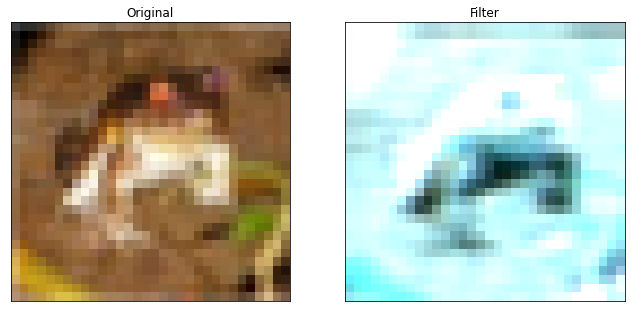

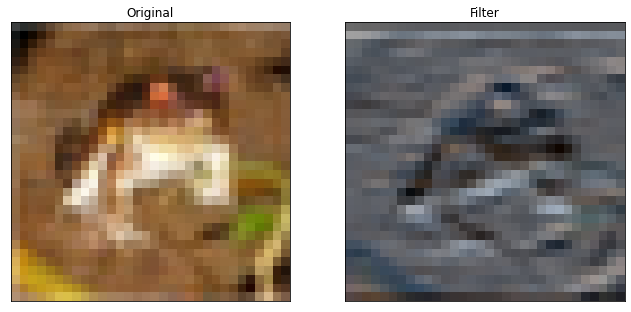

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


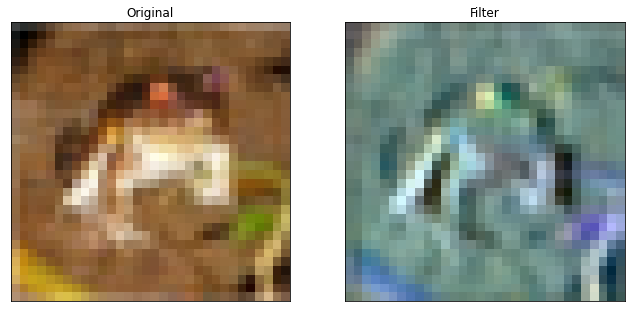

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


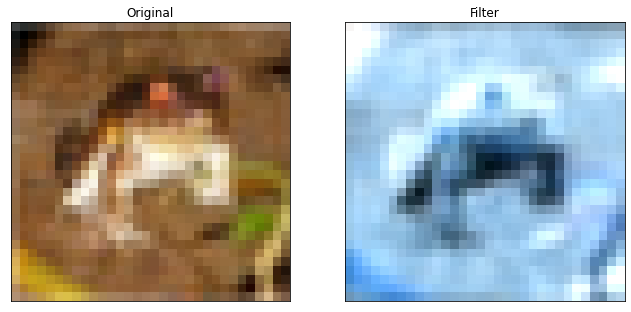

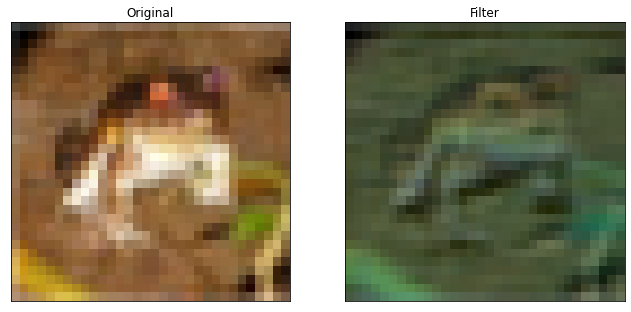

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


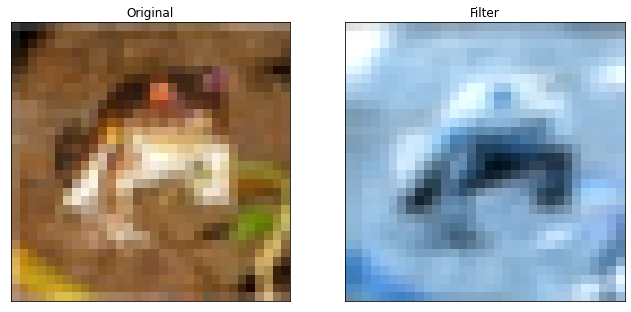

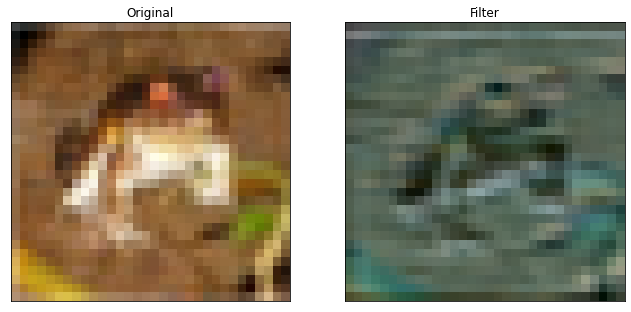

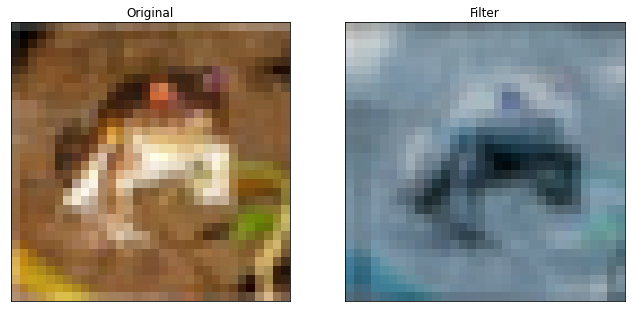

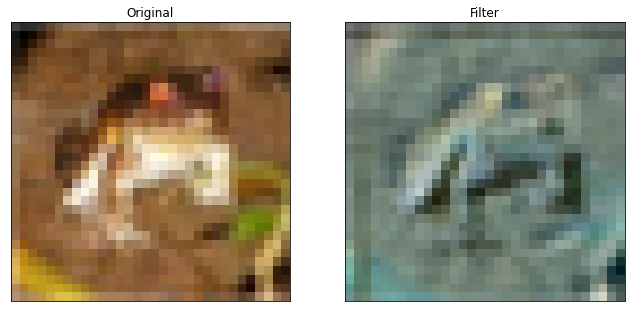

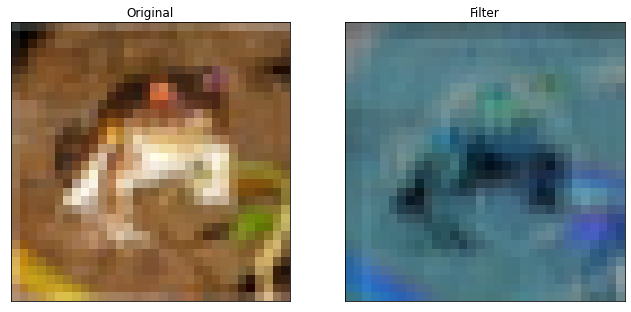

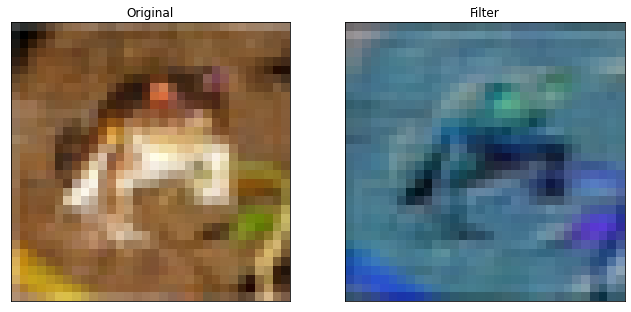

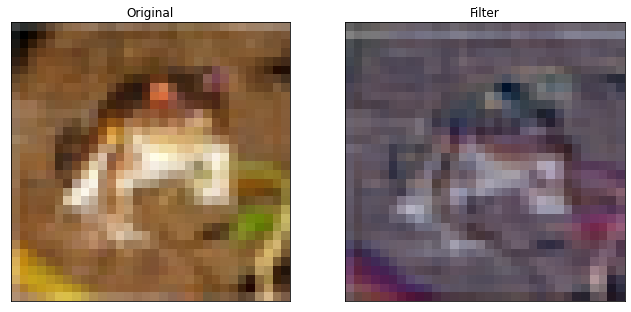

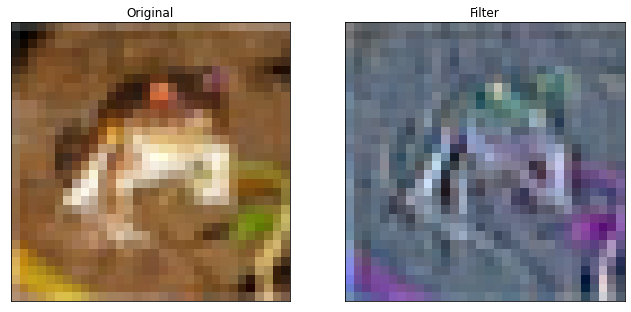

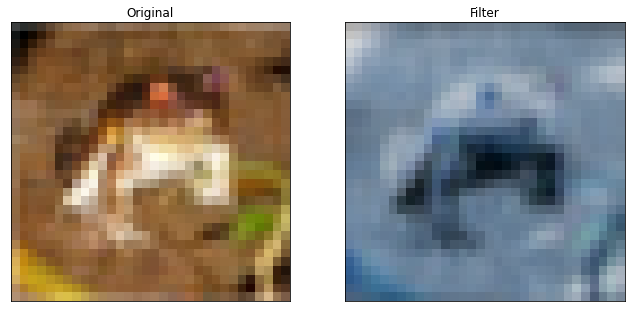

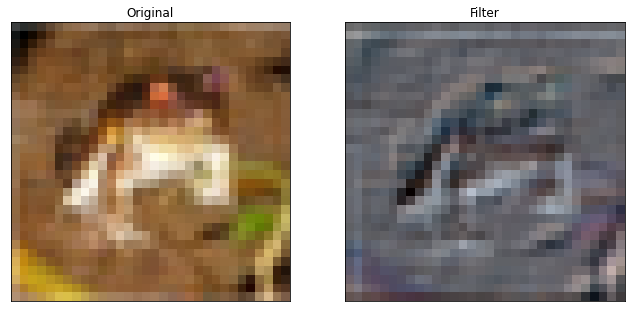

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


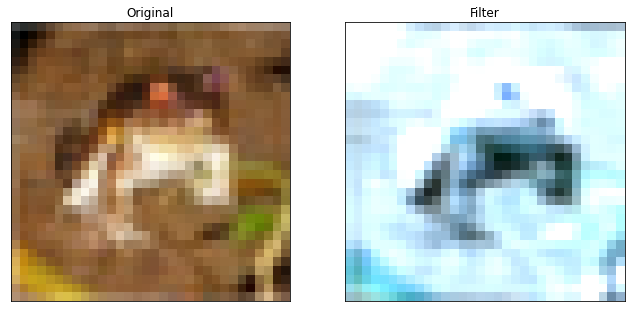

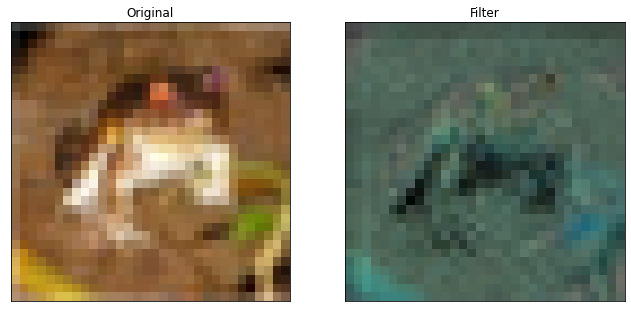

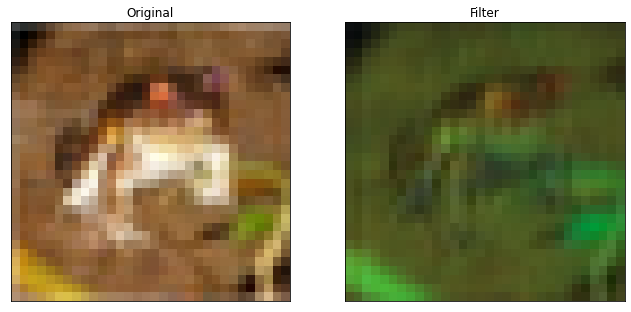

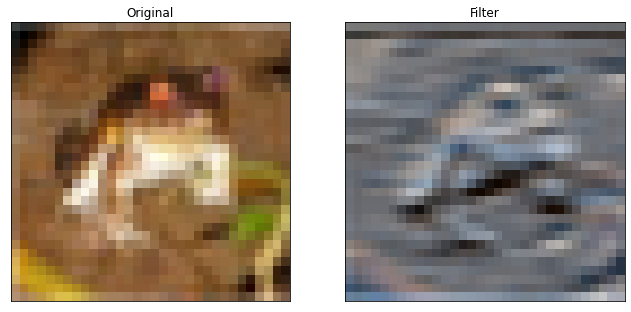

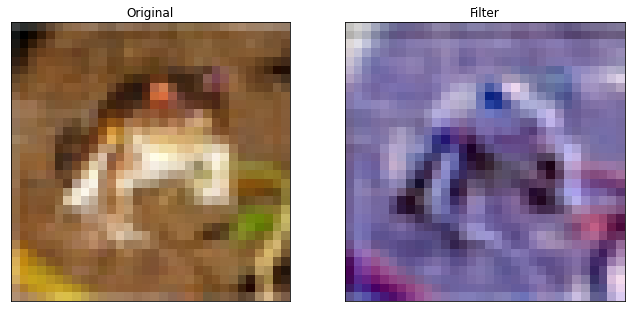

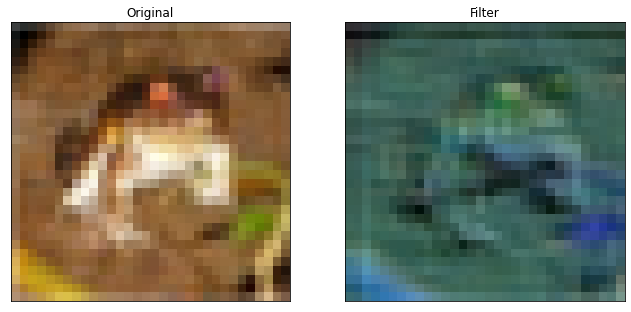

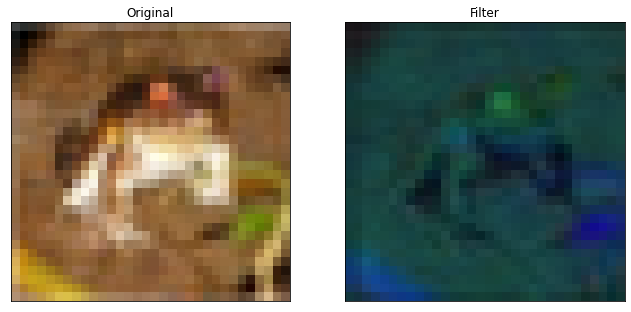

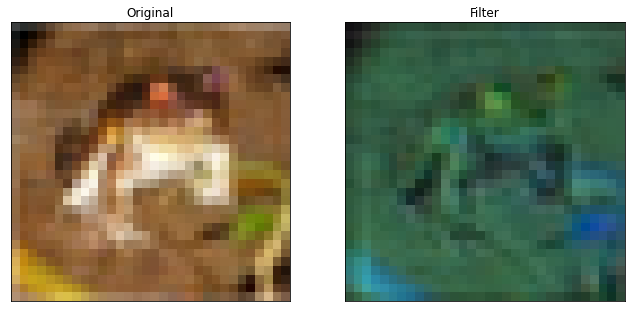

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


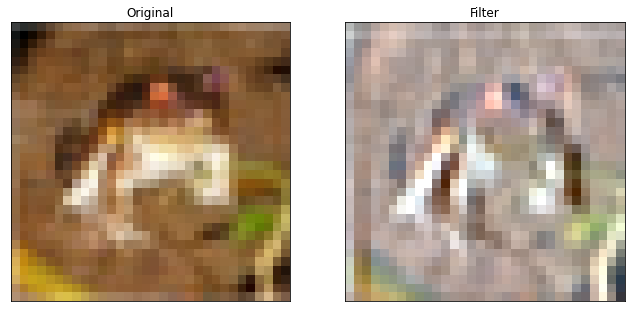

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


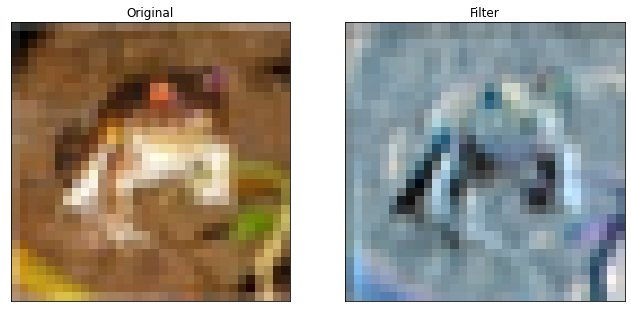

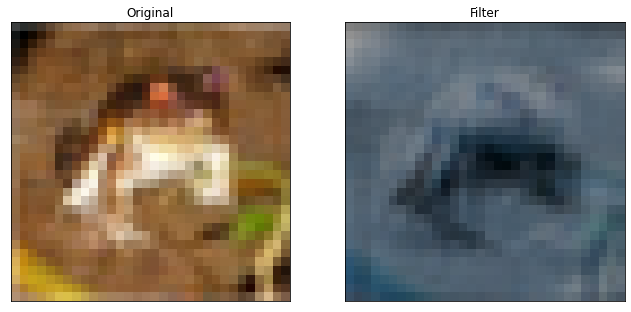

In [73]:
import numpy as np
import scipy
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = train_images[0]
figure_size = 20
img = image
for i in range(37):
    my_filter = x[:,:,:,i].numpy()
    #kernel = np.ones((5,5),np.float32)/25
    dst = scipy.ndimage.correlate(img/255,my_filter)
    plt.figure(figsize=(11,6))
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow((dst-dst.min())*255),plt.title('Filter')
    plt.xticks([]), plt.yticks([])
    plt.show()



In [59]:
(dst-dst.min())*255

array([[[117.09833082, 115.27302012, 116.23166868],
        [121.06900697, 119.07162698, 121.84492558],
        [112.49189004, 113.27927127, 119.92679911],
        ...,
        [ 68.94608658,  93.3543212 ,  93.2692192 ],
        [ 72.57656614,  96.3263798 ,  96.12428522],
        [ 73.02760257,  94.29591758,  93.4581916 ]],

       [[131.55461929, 130.35918976, 131.66263694],
        [135.33716314, 133.90160123, 136.9698227 ],
        [126.70409472, 127.96256232, 135.00404695],
        ...,
        [ 80.91313805, 109.3743114 , 110.4065175 ],
        [ 85.28632625, 113.08392131, 114.26133052],
        [ 85.97292135, 111.70599598, 111.92298985]],

       [[140.03530546, 141.38782627, 143.98757317],
        [142.68385369, 143.71903276, 149.61868314],
        [128.58481896, 134.5061545 , 144.35403235],
        ...,
        [ 95.30809285, 127.82666002, 128.54825884],
        [ 96.14745465, 128.99905794, 130.40976093],
        [ 96.97787513, 127.92819613, 127.96376767]],

       ...,

      

In [83]:
import tensorflow as tf
data_file ='G://all_train.csv/all_train.csv'
temp_data_set = tf.data.experimental.make_csv_dataset(
    data_file,
    batch_size=1000, 
    num_epochs = 1,
    label_name='# label',
    ignore_errors=True,)

def pack(features, label): # why tf decided to return feature in individual columns boggles the mind
  return tf.stack(list(features.values()), axis=-1), label  

packed_dataset = temp_data_set.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

[[ 4.7060732e-02  4.1853395e-01  5.1627558e-01 ...  4.5084780e-01
   3.5714844e-01  7.5000000e+02]
 [-6.2468868e-01 -1.8254833e-01 -6.0655171e-01 ... -4.9984702e-01
  -8.7943643e-01  1.5000000e+03]
 [ 3.1671634e-01 -7.8157651e-01 -8.7605870e-01 ...  2.4767187e+00
   1.4080857e+00  1.2500000e+03]
 ...
 [-7.2842024e-02 -1.3031062e+00  1.7151221e+00 ...  1.3859106e+00
   4.8814437e-01  1.2500000e+03]
 [ 2.7080625e-01  8.2457238e-01  6.8750846e-01 ...  2.3514751e-02
  -8.5617346e-01  1.0000000e+03]
 [-1.4572941e+00  1.3386978e+00  1.4539081e+00 ... -1.7319188e-01
   4.9407411e-01  7.5000000e+02]]

[1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 

In [84]:
# note that this is a very POOR version of the homework.  It contains severl key config errors
# Turn this in unchanged at your own peril
# YOU HAVE BEEN WARNED!!!
from time import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs_hw8\\{time()}")
es = EarlyStopping(patience=5)
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_absolute_error')

In [86]:
model.fit(packed_dataset)  # no validation!!! VERY BAD!!!

7000/7000 [==============================].1203 - mean_absolute_error: 0.243 - 238s 34ms/step - loss: 0.1203 - mean_absolute_error: 0.2435


In [69]:
packed_dataset = temp_data_set.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

[[-1.2382787e+00  1.5693170e+00 -1.4019052e+00  9.3232751e-01
  -1.0398028e+00 -1.0542208e+00 -4.7137854e-01  6.3841790e-02
   5.8950633e-01  7.5426072e-01 -1.7878474e+00  1.3552602e-01
  -6.2248909e-01  8.6064863e-01 -1.3114455e+00  2.3780255e+00
   9.4446754e-01 -8.1544012e-01 -1.1998061e+00  1.1219128e+00
   1.0104656e+00 -5.7368249e-01 -1.1279851e+00 -2.8217295e-01
  -2.7318230e-01  1.3661985e+00 -9.1884248e-02  1.0000000e+03]
 [-2.3046002e-01 -1.3252268e+00  2.7266449e-01 -2.1790957e-01
   1.3848433e+00 -5.9835622e-03 -9.4304478e-01 -7.4447614e-01
   6.1134267e-01 -1.3258014e+00 -7.6201701e-01 -7.3649776e-01
  -1.5581498e+00  8.6064863e-01 -4.8904711e-01 -2.4140322e+00
  -3.4087655e-01 -8.1544012e-01 -7.6561779e-01 -4.8341748e-01
  -1.1580172e+00  1.7431233e+00  1.5173751e+00  7.0004028e-01
   4.3114960e-01 -6.6546577e-01 -1.0202918e+00  7.5000000e+02]
 [-3.0029264e-01  7.3909330e-01 -8.8817292e-01  1.2109467e+00
  -8.8944358e-01 -1.0542208e+00  1.4253038e+00 -9.9575740e-01
   1.1

In [50]:
def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label

<tf.Tensor: shape=(), dtype=int64, numpy=-2>

In [44]:
packed_dataset = data_set.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

[[ 2.9973531e-01  1.0702428e+00 -3.9595896e-01  3.6319625e-01
   1.6382464e+00  8.5048848e-01  1.2366340e+00  3.9441311e-01
  -1.7082074e+00 -1.3258014e+00  1.5520862e+00 -2.4796578e-01
   1.2225328e-01  8.6064863e-01  7.6882851e-01  1.8653983e+00
  -2.3256446e-01  1.2263311e+00 -1.1807406e+00 -7.5199175e-01
   2.7869457e-01 -5.7368249e-01 -1.0036131e+00 -3.6008349e-01
   3.7187412e+00  2.8372151e-01  9.3601131e-01  7.5000000e+02]
 [-1.2053571e+00  1.5856284e+00 -1.0367472e+00 -1.0757325e+00
  -1.3599828e+00 -5.9835622e-03 -1.2252254e-01  9.7368395e-01
  -6.8747967e-01  7.5426072e-01  5.6454319e-01 -1.1062256e+00
   9.3583155e-01  8.6064863e-01 -6.7424011e-01 -1.6683710e+00
   5.9438270e-01 -8.1544012e-01 -1.6548333e+00 -1.2090025e+00
  -8.5829687e-01 -5.7368249e-01 -6.2278885e-01 -6.9111967e-01
  -3.8855872e-01 -5.8816820e-01  1.2923425e-01  1.0000000e+03]
 [-1.9023807e-01  5.4088753e-01  6.2532729e-01  4.6366584e-01
   9.8861784e-01 -5.9835622e-03  4.1530740e-01 -1.2512155e+00
  -8.2